# Collaborative Filtering

## 1. Type of Recommendation Engines
* **Recommend the most popular items**: no personalization
* **Using a classifier to make recommendation**: no sufficient features users and items explode
* **Recommendation Algorithms**
  - Content base algorithms: based on similarity of the items being recommended
  - Collaborative filtering algorithms: based on the past behavior

## 2. Assumption
People like things similar to other things they like, and things that are liked by other people with similar taste.

## 3. Type of Collaborative Filtering Algorithms
* Memory-Based Collaborative Filtering
* Model-Based Collaborative Filtering

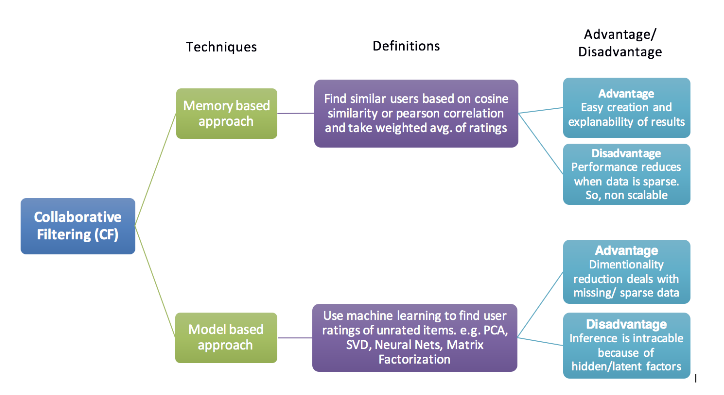

In [2]:
from IPython.display import Image
Image(filename='type of cf techniques.png')

### 3.1 Memory-Base Collaborative Filtering
* User-User Collaborative filtering: compute every customer pair, hard to compare
* Item-Item Collaborative filtering: less resource consuming

** Types of item similarity metrics**
* Jaccard Similarity
  - Similarity is based on the number of users which have rated item A and B divided by the number of users who have rated either A or B
  - It is typically used where we don’t have a numeric rating but just a boolean value like a product being bought or an add being clicked
* Cosine Similarity
  - Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
* Pearson correlation coefficient
  - Similarity is the pearson coefficient between the two vectors.

### 3.2 Model-Based Collaborative Filtering
* Matrix Factorization (MF): The idea behind such models is that attitudes or preferences of a user can be determined by a small number of hidden factors. We can call these factors as Embeddings.
* Clustering based algorithm (KNN): The idea of clustering is same as that of memory-based recommendation systems. In memory-based algorithms, we use the similarities between users and/or items and use them as weights to predict a rating for a user and an item. The difference is that the similarities in this approach are calculated based on an unsupervised learning model, rather than Pearson correlation or cosine similarity. In this approach, we also limit the number of similar users as k, which makes system more scalable.
* Neural Nets/ Deep Learning

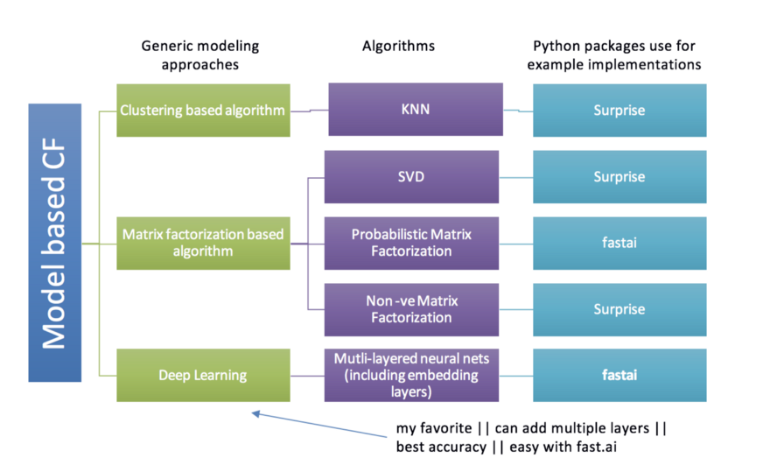

In [3]:
from IPython.display import Image
Image(filename='model based cf.png')

## Reference
- https://medium.com/ai-society/a-concise-recommender-systems-tutorial-fa40d5a9c0fa
- https://www.analyticsvidhya.com/blog/2016/06/quick-guide-build-recommendation-engine-python/
- https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0

In [1]:
# =============================================================================
# Import Packages
# =============================================================================
import pandas as pd
from surprise import Reader, Dataset
from surprise import SVD, evaluate
from surprise import NMF

In [6]:
import os
os.chdir('C:\\Users\\xuefei.yang\\Documents\\GitHub\\Machine-Learning-Notes\\Collaborative Filtering\\ml-latest-small')

# =============================================================================
# Load Data
# =============================================================================
ratings = pd.read_csv('ratings.csv') 

ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}
df = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is required.
# The Reader class is used to parse a file containing ratings.
reader = Reader(rating_scale=(0.5, 5.0))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [7]:
# =============================================================================
# Cross Validation
# =============================================================================
data.split(n_folds=5)

In [8]:
# =============================================================================
# Optimization
# =============================================================================
# svd
algo = SVD()
evaluate(algo, data, measures=['RMSE'])

# nmf
# algo = NMF()
# evaluate(algo, data, measures=['RMSE'])

C:\ProgramData\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8921
------------
Fold 2
RMSE: 0.8920
------------
Fold 3
RMSE: 0.8994
------------
Fold 4
RMSE: 0.9008
------------
Fold 5
RMSE: 0.8994
------------
------------
Mean RMSE: 0.8967
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8921283410643559,
                             0.89198454333484967,
                             0.89937265136180078,
                             0.90079710355660092,
                             0.89935996418167752]})

In [9]:
# =============================================================================
# Predict
# =============================================================================
# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

ratings[(ratings['userId'] == 196) & (ratings['movieId'] == 5)]
userid = str(196)
itemid = str(5)
actual_rating = 4
print (algo.predict(userid, 302, 4))

user: 196        item: 302        r_ui = 4.00   est = 3.60   {'was_impossible': False}
